In [ ]:
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import pandas as pd 


data = pd.read_csv('letter-recognition.xls')

# Convert labels (letters) to numbers, ensuring only single character labels are processed
data['letter'] = data['letter'].apply(lambda x : ord(x[0]) - ord('A') if len(x) == 1 else -1 )

# Remove rows where the label is invalid (not a single character)
data = data[data['letter'] != -1]

#split the features and labels 
X = data.iloc[: , 1:].values
y = data.iloc[: , 0].values

# one hot encode
y = to_categorical(y , num_classes = 26)

# train Test Split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Normalize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Build the deep Neural network model
model = Sequential([
    Dense(128 , activation = 'relu' , input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64 , activation = 'relu'),
    Dropout(0.3),
    Dense(26 , activation = 'softmax')
])

#Compile the model
model.compile(optimizer='adam' ,
             loss = 'categorical_crossentropy' ,
             metrics=['accuracy'])

# train the model
history = model.fit(X_train , y_train , 
                   epochs = 30 ,
                   batch_size = 32 ,
                   validation_split = 0.2 ,
                   verbose = 1)

test_loss , test_accuracy = model.evaluate(X_test , y_test , verbose = 0)
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("Classification Report : ")
print(classification_report(y_true , y_pred , target_names=[chr(i) for i in range (ord('A') , ord('Z') + 1)]))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[chr(i) for i in range(65,91)], yticklabels=[chr(i) for i in range(65,91)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import pandas as pd 

In [23]:
data = pd.read_csv('letter-recognition.xls')

In [24]:
# Convert labels (letters) to numbers, ensuring only single character labels are processed
data['letter'] = data['letter'].apply(lambda x : ord(x[0]) - ord('A') if len(x) == 1 else -1 )

# Remove rows where the label is invalid (not a single character)
data = data[data['letter'] != -1]

In [25]:
#split the features and labels 
X = data.iloc[: , 1:].values
y = data.iloc[: , 0].values

In [26]:
# one hot encode
y = to_categorical(y , num_classes = 26)

In [27]:
# train Test Split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [28]:
# Normalize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Build the deep Neural network model
model = Sequential([
    Dense(128 , activation = 'relu' , input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64 , activation = 'relu'),
    Dropout(0.3),
    Dense(26 , activation = 'softmax')
])

c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#Compile the model
model.compile(optimizer='adam' ,
             loss = 'categorical_crossentropy' ,
             metrics=['accuracy'])

In [31]:
# train the model
history = model.fit(X_train , y_train , 
                   epochs = 30 ,
                   batch_size = 32 ,
                   validation_split = 0.2 ,
                   verbose = 1)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2409 - loss: 2.6408 - val_accuracy: 0.6859 - val_loss: 1.1738
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5951 - loss: 1.3229 - val_accuracy: 0.7484 - val_loss: 0.8907
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.6645 - loss: 1.0706 - val_accuracy: 0.7834 - val_loss: 0.7648
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6983 - loss: 0.9606 - val_accuracy: 0.8028 - val_loss: 0.6799
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7250 - loss: 0.8694 - val_accuracy: 0.8216 - val_loss: 0.6182
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7309 - loss: 0.8427 - val_accuracy: 0.8366 - val_loss: 0.5696
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7460 - loss: 0.7845 - val_accuracy: 0.8456 - val_loss: 0.5334
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7693 - loss: 0.7426 - val_accuracy

In [32]:
#Evaluate the model on test data 
test_loss , test_accuracy = model.evaluate(X_test , y_test , verbose=0)
print(f"Test Accuracy : {test_accuracy*100:.2f}%")

Test Accuracy : 92.77%


In [33]:
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [34]:
print(classification_report(y_true , y_pred , target_names=[chr(i) for i in range (ord('A') , ord('Z')+1)]))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       149
           B       0.84      0.94      0.89       153
           C       0.98      0.91      0.94       137
           D       0.88      0.93      0.91       156
           E       0.92      0.94      0.93       141
           F       0.92      0.89      0.91       140
           G       0.87      0.94      0.90       160
           H       0.88      0.74      0.81       144
           I       1.00      0.87      0.93       146
           J       0.94      0.96      0.95       149
           K       0.88      0.88      0.88       130
           L       0.96      0.92      0.94       155
           M       0.96      0.95      0.96       168
           N       0.97      0.92      0.95       151
           O       0.89      0.94      0.92       145
           P       0.98      0.91      0.94       173
           Q       0.97      0.96      0.97       166
           R       0.81    

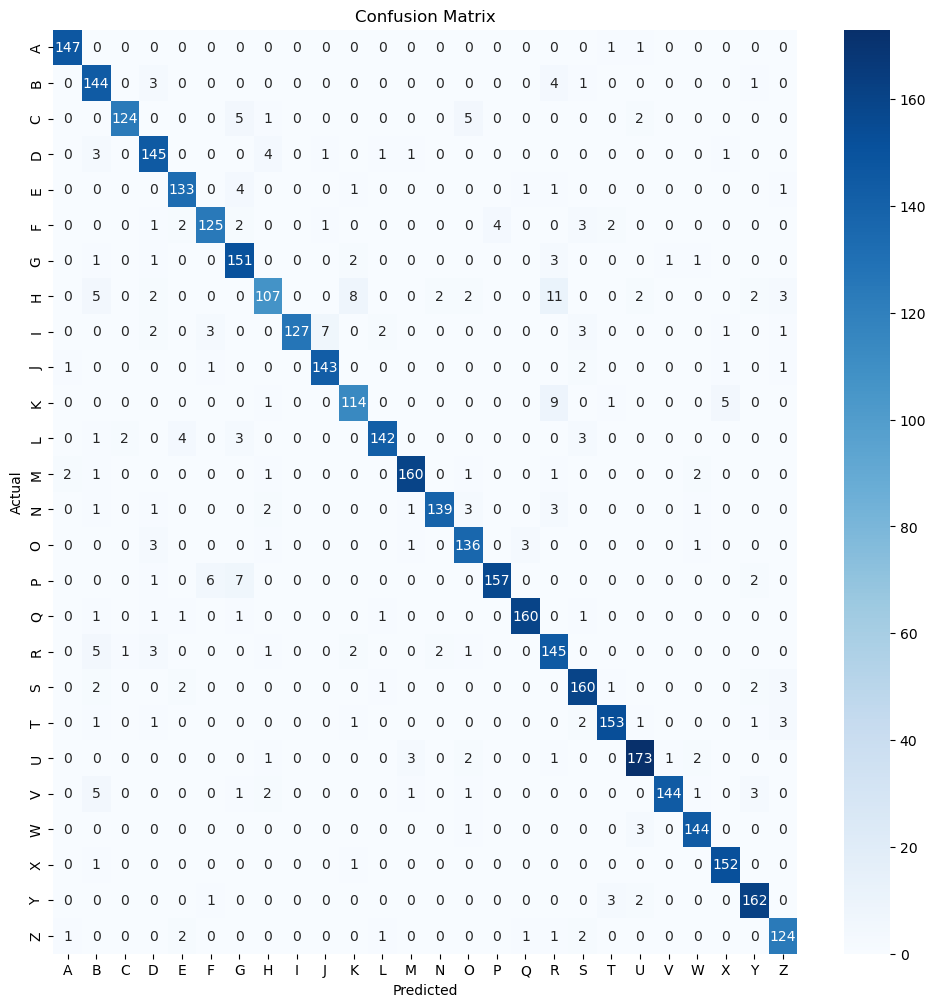

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true , y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm , annot=True , fmt='d',cmap='Blues',xticklabels=[chr(i) for i in range(65,91)] , yticklabels=[chr(i) for i in range(65,91)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

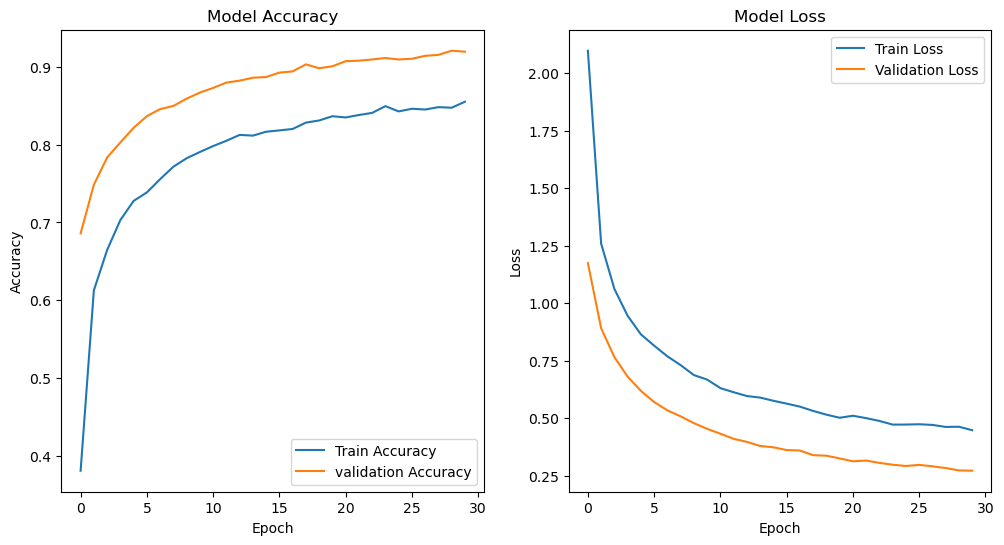

In [37]:
plt.figure(figsize=(12,6))

#plot accuracy 
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] , label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'] , label='Train Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()